In [29]:
# import packages and data

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy


iris = pd.read_csv('./iris.csv')

In [30]:
# inspect data

iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [31]:
iris.shape

(150, 6)

In [32]:
iris.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [33]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [34]:
iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

[Text(0, 0, '50'), Text(0, 0, '50'), Text(0, 0, '50')]

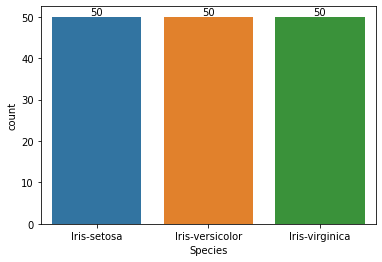

In [35]:
species_plot = sns.countplot(x='Species', data=iris)
species_plot.bar_label(species_plot.containers[0])

In [36]:
# convert species names into numbers

num_convert = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}

iris['Species'] = iris["Species"].map(num_convert)

iris.head(150)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,2
146,147,6.3,2.5,5.0,1.9,2
147,148,6.5,3.0,5.2,2.0,2
148,149,6.2,3.4,5.4,2.3,2


In [37]:
iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [38]:
# drop id column

iris.drop(['Id'], axis=1, inplace=True)
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


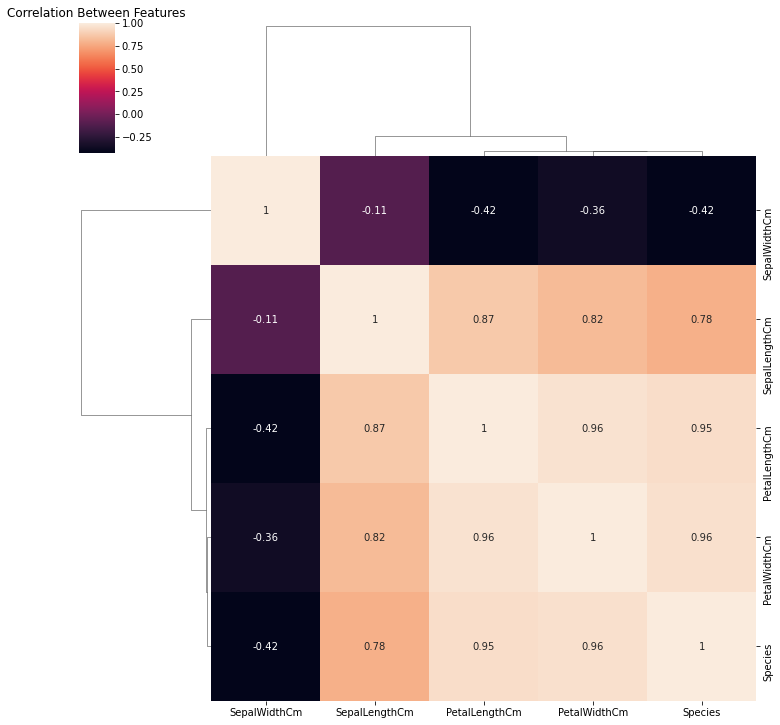

In [40]:
# generate correlation matrix

corr_mat = iris.corr()

sns.clustermap(corr_mat, annot = True)
plt.title("Correlation Between Features")

plt.show()

- negative correlation between sepal width and petal length, petal width, and species. Weaker correlation between sepal length and sepal width
- strong positive correlation between species and petal length, petal width
- sepal length has weaker positve correlation with species, petal lentgth, and petal width

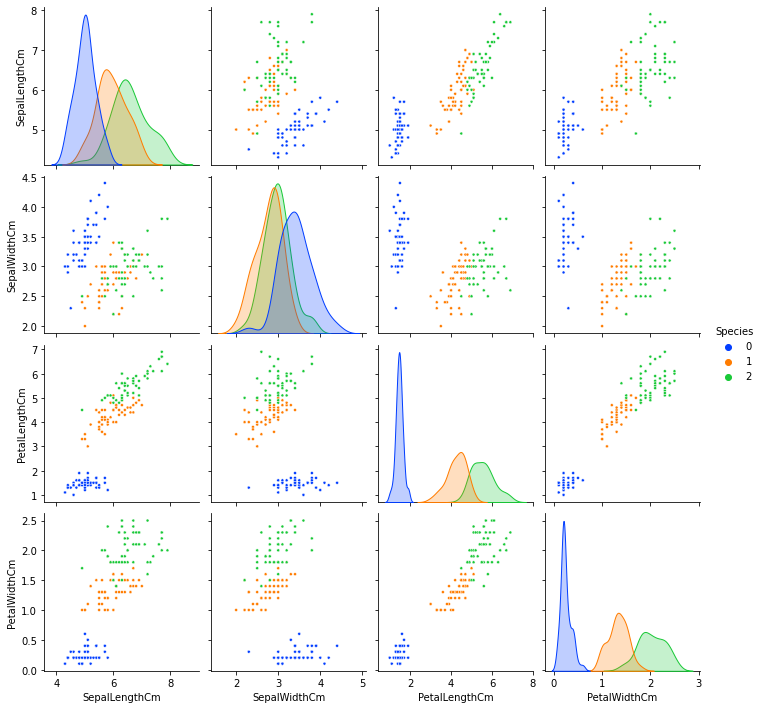

In [55]:
# pair plots
threshold = -0.5

 

filt = np.abs(corr_mat["Species"]) > threshold
corr_feat = corr_mat.columns[filt].tolist()

sns.pairplot(iris[corr_feat], diag_kind = "kde", markers = '.', hue = "Species", palette='bright')


plt.show()

- Species 0 is linearly separable by petal length, and nearly linearly separable by petal width
- Species 1 and 2 are more similar in petal length and petal width
- All three species are very similar in sepal width
- petal width vs sepal length seems to be a good way to split species 1 and 2

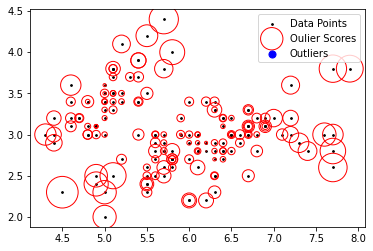

In [63]:
# outlier detection
from sklearn.neighbors import LocalOutlierFactor


y = iris['Species']
x = iris.drop(['Species'], axis = 1)

clf = LocalOutlierFactor(n_neighbors = 20)
clf.fit_predict(x)
xScore = clf.negative_outlier_factor_

outlierScore = pd.DataFrame()
outlierScore["score"] = xScore

threshold = -2
filt = outlierScore["score"] < threshold
outlierIndex = outlierScore[filt].index.tolist()

radius = (xScore.max() - xScore) / (xScore.max() - xScore.min())
outlierScore["radius"] = radius

plt.scatter(x.iloc[:, 0], x.iloc[:, 1], color = 'k', s = 3, label = "Data Points")
plt.scatter(x.iloc[:, 0], x.iloc[:, 1], s = 1000 * radius, edgecolors = 'r', facecolors = "none", label = "Oulier Scores")
plt.scatter(x.iloc[outlierIndex, 0], x.iloc[outlierIndex, 1], color = 'b', s = 50, label = "Outliers")
plt.legend()

plt.show()

In [80]:
# normalise data
from sklearn import preprocessing

features = iris.drop(['Species'], axis=1)

scaler = preprocessing.MinMaxScaler()

min_max = scaler.fit_transform(features)

features_minmax = pd.DataFrame(min_max, columns=features.columns)

features_minmax.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667


In [81]:
features_minmax.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,0.428704,0.439167,0.467571,0.457778
std,0.230018,0.180664,0.299054,0.317984
min,0.000000,0.000000,0.000000,0.000000
25%,0.222222,0.333333,0.101695,0.083333
50%,0.416667,0.416667,0.567797,0.500000
75%,0.583333,0.541667,0.694915,0.708333
max,1.000000,1.000000,1.000000,1.000000


In [88]:
# create minmax dataframe

iris_minmax = pd.concat([iris['Species'], features_minmax], axis=1)
iris_minmax.head()

,Species,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,0,0.222222,0.625000,0.067797,0.041667
1,0,0.166667,0.416667,0.067797,0.041667
2,0,0.111111,0.500000,0.050847,0.041667
3,0,0.083333,0.458333,0.084746,0.041667
4,0,0.194444,0.666667,0.067797,0.041667


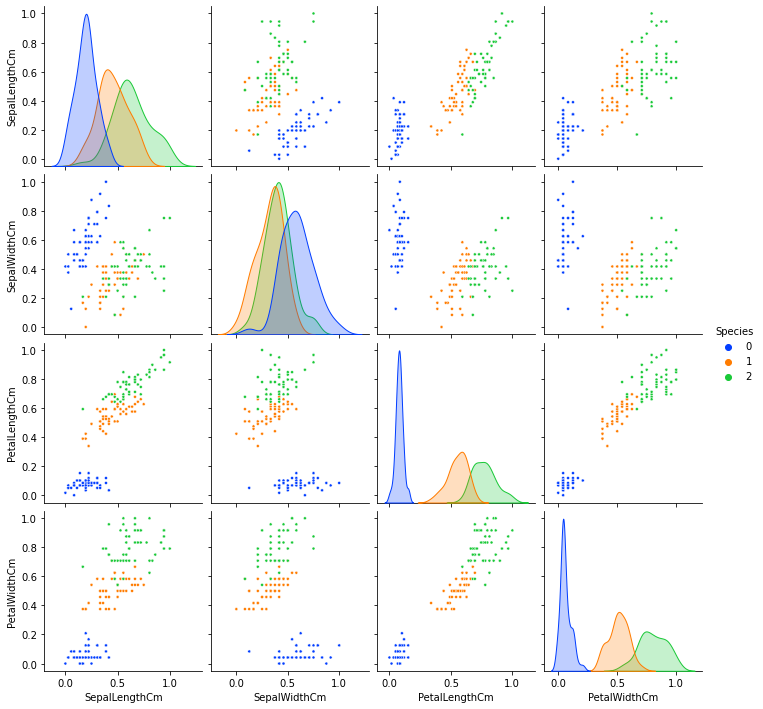

In [90]:
# check if normalisation affected pairplots

minmax_corr_mat = iris_minmax.corr()

threshold = -0.5

filt = np.abs(minmax_corr_mat["Species"]) > threshold
corr_feat = minmax_corr_mat.columns[filt].tolist()

sns.pairplot(iris_minmax[corr_feat], diag_kind = "kde", markers = '.', hue = "Species", palette='bright')


plt.show()

In [95]:
# split data into training, validation, and test sets

from sklearn.model_selection import train_test_split

features = features_minmax
labels = pd.DataFrame(iris_minmax, columns=['Species'])

x_train, x_test, y_train, y_test = train_test_split(features, labels, random_state=42, test_size=0.4) # training set
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, random_state=42, test_size=0.5) # splits remaining into val and test

In [96]:
# export datasets

x_train.to_csv('./x_train_features.csv', header=None, index=False)
x_val.to_csv('./x_val_features.csv', header=None, index=False)    
x_test.to_csv('./x_test_features.csv', header=None, index=False)

y_train.to_csv('./y_train_labels.csv', header=None, index=False)
y_val.to_csv('./y_val_labels.csv', header=None, index=False)
y_test.to_csv('./y_test_labels.csv', header=None, index=False)